# MLE and MAP for Normal Distribution

In [1]:
# imports
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt


## Question 1

Read the csv file `triple_vertical.csv` into a data frame. The
description of this data file can be found in `triple_vertical.txt`.
Assume the column ‘vertical’ is distributed normally.

In [2]:
triple_vertical_df = pd.read_csv('triple_vertical.csv')
with open('triple_vertical.txt') as f:
    print(f.read())
triple_vertical_df.head()

Dataset:  triple_vertical.csv

Source: R.T. Hamilton, S.J. Schultz, R.J. Schmitz, D.H. Perrin (2008).
"Triple-Hop Distance as a Valid Predictor of Lower Limb Strength and Power,"
Journal of Athletic Training, Vol. 43, #2, pp. 144-151.

Description: Triple Hop Distance and Vertical jump height (both, in cm)
for 40 collegiate soccer players. Data simulated to match mean, sd, min, max, corr.

Variables/Labels
Triple-Hop distance in cm   (triple)
Vertical jump in cm  (vertical)


,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


(a) Calculate MLE for $\mu$ and $\sigma^2$

In [3]:
mle_𝜇 = triple_vertical_df['vertical'].mean()
mle_𝜎_sq = ((triple_vertical_df['vertical']-mle_𝜇)**2).mean()
mle_𝜎 = math.sqrt(mle_𝜎_sq)
print('Maximum likelyhood estimators for 𝜇 = %.2f and 𝜎^2 = %.2f' % (mle_𝜇, mle_𝜎_sq))


Maximum likelyhood estimators for 𝜇 = 49.30 and 𝜎^2 = 113.88


(b) Calculate the estimated standard error for $\mu$

In [4]:
std_err_𝜇 = mle_𝜎/math.sqrt(triple_vertical_df['vertical'].count())
print('Standard error for 𝜇 = %.2f' % std_err_𝜇)


Standard error for 𝜇 = 1.69


(c) Calculate the approximate 95% confidence interval.

In [6]:
print('We expect 95%% of new data following the same distribution to be in the interval (%.2f, %.2f)' % norm.interval(0.95, loc=mle_𝜇, scale=std_err_𝜇))


We expect 95% of new data following the same distribution to be in the interval (45.99, 52.61)


## Question 2

In this question we will compare MLE and MAP estimators when our prior is **wrong**.

Consider samples from a normal distribution with σ = 20 and μ unknown with prior N(0,1).

(a) For this exercise choose $\mu=10$ and sample from $\mathcal{N}(\mu, \sigma^2)$ with and with sample sizes $\left[10, 50, 100, 1000\right]$. For each sample calculate the MLE of $\mu$ (when no prior is assumed) and the MAP estimator of $\mu$ with the above prior. 

In [15]:
sample_sizes = [10,50,100,500, 1000, 2000]
𝜇 = 10
𝜎 = 20
samples = []
mle_𝜇_samples = []
map_𝜇_samples = []
for s_size in sample_sizes:
    # Create sample
    sample = np.random.normal(𝜇, 𝜎, s_size)
    𝜇_mle = sample.mean()
    𝜇_map = sample.sum()/(s_size+𝜎**2)
    
    # Add to lists
    samples.append(sample)
    mle_𝜇_samples.append(𝜇_mle)
    map_𝜇_samples.append(𝜇_map)

(b) Plot the error of the MLE and of the MAP estimator as a function of the sample size. Explain your results.

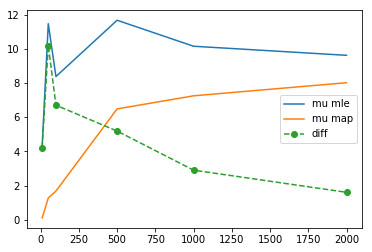

In [24]:
plt.plot(sample_sizes, np.asarray(mle_𝜇_samples), label='mu mle')
plt.plot(sample_sizes, np.asarray(map_𝜇_samples), label='mu map')
plt.plot(sample_sizes, np.asarray(mle_𝜇_samples)-np.asarray(map_𝜇_samples), 'o--', label='diff')
plt.legend()
plt.show()

The error rate between MLE and MAP slowly moves towards 0.

The MAP estimator is less affected by the Prior and more in line with the Posterior when the sample size gets bigger.

So the error between both estimators is high for small sample sizes because the MLE is highly subject to the variance and the MAP is highly affected by the wrong Prior.

But both values converge to the actual 𝜇 of the distribution when the sample size grows.

## Question 3 
(bonus)

Calculate the bias of the MLE for the mean and the variance of the normal distribution.

The Bias of an estimator is defined as: <b><font color='blue'>the mean deviation from the true value.</color></b>

<center><h4>$
\begin{align}bias(\hat\theta) &= E[\hat\theta] - \theta\\ \\
bias(\hat\mu) &= E[\hat\mu] - \mu \\ 
&= \hat\mu - \mu \\
&= 0\\
\end{align}
$</H4></center>
<b>The MLE for the mean is an unbiased estimator.</b>

<center><h4>$\begin{align}
bias(\hat\sigma^2) &= E[\hat\sigma^2] - \sigma^2 \\
&= E\bigg[\dfrac{1}{N}\sum_{i=1}^{N}(x_i-\hat\mu)^2\bigg] - \sigma^2 \\
&= \dfrac{1}{N}E\bigg[\sum_{i=1}^{N}x_i^2-\sum_{i=1}^{N}x_i\hat\mu + \sum_{i=1}^{N}\hat\mu^2\bigg] - \sigma^2\\
&= \dfrac{1}{N}E\bigg[\sum_{i=1}^{N}x_i^2-2N\cdot\hat\mu+N\cdot\hat\mu\bigg] - \sigma^2\\
&= \dfrac{1}{N}E\bigg[\sum_{i=1}^{N}x_i^2-N\cdot\hat\mu\bigg] - \sigma^2\\
&= \dfrac{1}{N}E\bigg[\sum_{i=1}^{N}x_i^2\bigg] - E[\hat\mu^2] - \sigma^2\\
&= E[x^2] - E[\hat\mu^2] - \sigma^2\\
\end{align}
$</H4></center>

We know that $\sigma_x^2 = E[x^2]-E[x]^2$ and $\sigma_\mu^2=E[\mu^2]-E[\mu]^2$ and, $E[x]= E[\mu]=\mu$

It follows: 
<h4><center>
$\begin{align}E[x^2] - E[\hat\mu^2] &= \hat\sigma_x^2 - \sigma_\hat\mu^2\\
bias(\hat\theta) &= \hat\sigma_x^2 - \sigma_\hat\mu^2 - \sigma^2
\end{align}$
</h4></center>

And $\sigma_\hat\mu^2 = VAR[\hat\mu] = \dfrac{1}{N^2}VAR[\sum_{i=1}^{N}x_i]$

Since the samples are drawn IID:
$VAR[\sum_{i=1}^{N}x_i] = N\cdot VAR[x]$

Thus, $\sigma_\hat\mu^2=\dfrac{1}{N}VAR[x]=\dfrac{1}{N}\hat\sigma_x^2$

Finally, 
<h4><center>
$\boxed{\begin{align}bias(\hat\theta) &= \hat\sigma_x^2 - \dfrac{1}{N}\hat\sigma_x^2 - \sigma^2\\
&= \dfrac{N-1}{N}\hat\sigma_x^2 - \sigma^2 \\
&= \dfrac{-1}{N}\cdot\sigma^2
\end{align}}$
</h4></center>

<b>The variance estimator is biased and we could apply the following correction to its calculation:</b>
<h4><center>
$\hat\sigma^2 = \dfrac{1}{N-1}\sum_{i=1}^{N}(x_i-\hat\mu)^2$
</h4></center>